In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import MinMaxScaler

C:\Users\M Rizwan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
#separating features and output
train = pd.read_csv('train.txt', sep=",")
data = train.values
x = data[:,0:4]
y = data[:,4]
y = np.reshape(y, (-1,1))

In [14]:
#function to remove sparsity from training and testing data
def remove_sparsity(x):
    for i in range(1,3):
        avg = np.average(x[:,i])
        for j in range(len(x[:,i])):
            if(x[j,i] == 0):
                x[j,i] = avg
    return x
x = remove_sparsity(x)

In [16]:
#Normalizing the data
scaler = MinMaxScaler(feature_range = (0,1))
print(scaler.fit(x))
print(scaler.fit(y))
x = scaler.transform(x)
y = scaler.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [17]:
x

array([[-0.04626335, -0.04981814, -0.04881429, -0.04982206],
       [-0.01423488, -0.04981814, -0.04881429, -0.04979929],
       [-0.01779359, -0.04981814, -0.04881429, -0.04979929],
       ...,
       [-0.03558719, -0.04981637, -0.04641993, -0.04854662],
       [-0.03558719, -0.04980783, -0.0480911 , -0.04952598],
       [-0.03558719, -0.04981352, -0.04862918, -0.04959431]])

In [18]:
y

array([[0.03558719],
       [0.01423488],
       [0.        ],
       ...,
       [0.19217082],
       [0.19217082],
       [0.19217082]])

In [37]:
#Model Topology
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='msle', optimizer='adamax', metrics=['mse', 'mae', 'msle', 'cosine'])
history = model.fit(x, y, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
199999/199999 [==============================] - 17s 87us/step - loss: 0.0108 - mean_squared_error: 0.0165 - mean_absolute_error: 0.1054 - cosine_proximity: -0.9994
Epoch 2/200
199999/199999 [==============================] - 17s 87us/step - loss: 0.0106 - mean_squared_error: 0.0162 - mean_absolute_error: 0.1045 - cosine_proximity: -0.99970s - loss: 0.0106 - mean_squared_error: 0.0162 - mean_absolute_error: 0.1045 - cosine_proximity: -0.99
Epoch 3/200
199999/199999 [==============================] - 16s 81us/step - loss: 0.0105 - mean_squared_error: 0.0160 - mean_absolute_error: 0.1038 - cosine_proximity: -0.9997
Epoch 4/200
199999/199999 [==============================] - 14s 69us/step - loss: 0.0102 - mean_squared_error: 0.0157 - mean_absolute_error: 0.1022 - cosine_proximity: -0.9997
Epoch 5/200
199999/199999 [==============================] - 14s 69us/step - loss: 0.0098 - mean_squared_error: 0.0150 - mean_absolute_error: 0.0986 - cosine_proximity: -0.9996
Epoch 6/200
1

199999/199999 [==============================] - 15s 75us/step - loss: 0.0090 - mean_squared_error: 0.0140 - mean_absolute_error: 0.0928 - cosine_proximity: -0.9996
Epoch 45/200
199999/199999 [==============================] - 9s 46us/step - loss: 0.0090 - mean_squared_error: 0.0140 - mean_absolute_error: 0.0926 - cosine_proximity: -0.9997
Epoch 46/200
199999/199999 [==============================] - 9s 43us/step - loss: 0.0090 - mean_squared_error: 0.0140 - mean_absolute_error: 0.0926 - cosine_proximity: -0.9996
Epoch 47/200
199999/199999 [==============================] - 9s 46us/step - loss: 0.0090 - mean_squared_error: 0.0140 - mean_absolute_error: 0.0928 - cosine_proximity: -0.9996
Epoch 48/200
199999/199999 [==============================] - 16s 81us/step - loss: 0.0089 - mean_squared_error: 0.0139 - mean_absolute_error: 0.0924 - cosine_proximity: -0.9996
Epoch 49/200
199999/199999 [==============================] - 12s 58us/step - loss: 0.0090 - mean_squared_error: 0.0139 - mean

199999/199999 [==============================] - 10s 50us/step - loss: 0.0088 - mean_squared_error: 0.0137 - mean_absolute_error: 0.0912 - cosine_proximity: -0.9995
Epoch 88/200
199999/199999 [==============================] - 10s 50us/step - loss: 0.0088 - mean_squared_error: 0.0137 - mean_absolute_error: 0.0913 - cosine_proximity: -0.9996
Epoch 89/200
199999/199999 [==============================] - 10s 51us/step - loss: 0.0088 - mean_squared_error: 0.0137 - mean_absolute_error: 0.0910 - cosine_proximity: -0.9996
Epoch 90/200
199999/199999 [==============================] - 10s 50us/step - loss: 0.0088 - mean_squared_error: 0.0137 - mean_absolute_error: 0.0911 - cosine_proximity: -0.9995
Epoch 91/200
199999/199999 [==============================] - 10s 50us/step - loss: 0.0088 - mean_squared_error: 0.0136 - mean_absolute_error: 0.0908 - cosine_proximity: -0.9995
Epoch 92/200
199999/199999 [==============================] - 10s 51us/step - loss: 0.0088 - mean_squared_error: 0.0137 - m

199999/199999 [==============================] - 16s 80us/step - loss: 0.0086 - mean_squared_error: 0.0134 - mean_absolute_error: 0.0895 - cosine_proximity: -0.9995
Epoch 130/200
199999/199999 [==============================] - 15s 77us/step - loss: 0.0086 - mean_squared_error: 0.0134 - mean_absolute_error: 0.0894 - cosine_proximity: -0.9995
Epoch 131/200
199999/199999 [==============================] - 16s 78us/step - loss: 0.0086 - mean_squared_error: 0.0134 - mean_absolute_error: 0.0891 - cosine_proximity: -0.9995
Epoch 132/200
199999/199999 [==============================] - 16s 78us/step - loss: 0.0086 - mean_squared_error: 0.0134 - mean_absolute_error: 0.0892 - cosine_proximity: -0.9995
Epoch 133/200
199999/199999 [==============================] - 16s 79us/step - loss: 0.0086 - mean_squared_error: 0.0134 - mean_absolute_error: 0.0895 - cosine_proximity: -0.9996
Epoch 134/200
199999/199999 [==============================] - 16s 79us/step - loss: 0.0086 - mean_squared_error: 0.013

199999/199999 [==============================] - 12s 60us/step - loss: 0.0085 - mean_squared_error: 0.0133 - mean_absolute_error: 0.0888 - cosine_proximity: -0.99942s - loss: 0.0085 - mean_squared_error: 0.0133 - m
Epoch 174/200
199999/199999 [==============================] - 9s 45us/step - loss: 0.0085 - mean_squared_error: 0.0133 - mean_absolute_error: 0.0888 - cosine_proximity: -0.9995
Epoch 175/200
199999/199999 [==============================] - 9s 45us/step - loss: 0.0085 - mean_squared_error: 0.0133 - mean_absolute_error: 0.0889 - cosine_proximity: -0.9994
Epoch 176/200
199999/199999 [==============================] - 10s 49us/step - loss: 0.0085 - mean_squared_error: 0.0133 - mean_absolute_error: 0.0889 - cosine_proximity: -0.99954s - loss: 0.0085 - mean - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0133 - mean_absolute_error: 0.0889 - cosine_proximity: -0.99
Epoch 177/200
199999/199999 [==============================] - 12s 62us/step - loss: 0.0085 - mean_squared_error: 0.

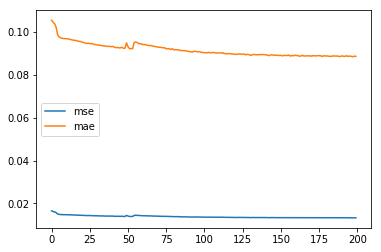

In [41]:
#ploting different metrics
plt.plot(history.history['mean_squared_error'], label='mse')
plt.plot(history.history['mean_absolute_error'], label='mae')
#plt.plot(history.history['mean_squared_logarithmic_error'], label='msle')
plt.legend(loc = 'center left')
plt.show()

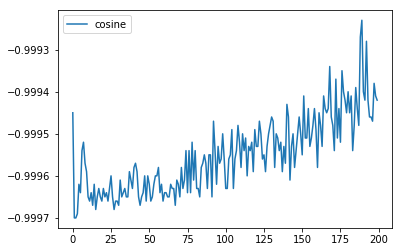

In [43]:
plt.plot(history.history['cosine_proximity'], label='cosine')
plt.legend()
plt.show()

In [44]:
#Normalizing the test data
test = pd.read_csv('test.txt', sep=",")
data = test.values
xt = data[:,0:4]
yt = data[:,4]
yt = np.reshape(yt, (-1,1))
xt = remove_sparsity(xt)
scaler = MinMaxScaler(feature_range = (0,1))
print(scaler.fit(xt))
print(scaler.fit(yt))
xt = scaler.transform(xt)
yt = scaler.transform(yt)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [45]:
#evaluating model on training and test set
trainScore = model.evaluate(x,y)
testScore = model.evaluate(xt,yt)
print(trainScore)
print(testScore)

3247/3247 [==============================] - 0s 44us/step
[0.007984642620872388, 0.012523767203747484, 0.08707180431905197, -0.9997000759148922]
[0.17764866156581002, 0.35933427534215, 0.5464098365225349, -0.4899907136536173]


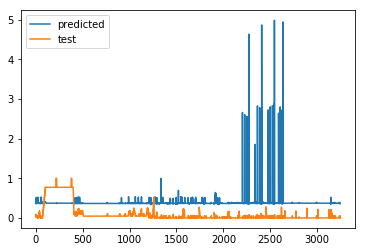

In [35]:
#plotting actual values, predicted values and difference of the value
p = model.predict(xt)
dif = np.abs(yt-p)
plt.plot(p,label='predicted')
plt.plot(yt,label='test')
#plt.plot(dif,label='diff')
plt.legend(loc='upper left')
plt.show()

In [52]:
p

array([[0.48664254],
       [0.5183577 ],
       [0.48675686],
       ...,
       [0.43661812],
       [0.51115656],
       [0.23927823]], dtype=float32)

In [53]:
yt

array([[0.02673797],
       [0.0828877 ],
       [0.09090909],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [54]:
dif

array([[0.45990457],
       [0.43546999],
       [0.39584777],
       ...,
       [0.43661812],
       [0.51115656],
       [0.23927823]])